<a href="https://colab.research.google.com/github/ju-jmdr/chatbot-aula4-imersaoIA-Alura/blob/main/chatbot_aula4_Imers%C3%A3oIA_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

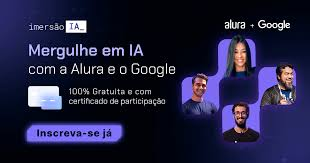

O projeto a seguir trata-se do desenvolvimento de um **chatbot** que faz o uso da **inteligência artificial generativa do Google**, o modelo **Gemini**.

Ele foi desenvolvido com o auxílio das instruções fornecidas na aula 4 da **imersão IA da Alura** em parceria com o **Google** e a **FIAP**.
*   Linguagem de programação: Python

Instalando o SDK do Google.

In [1]:
!pip install -q -U google-generativeai

 Configurando o ambiente para que você possa usar a API Generative AI do Google em seu código Python, utilizando a sua chave de API para autenticação.




In [2]:
# Import the Python SDK
import google.generativeai as genai

from google.colab import userdata

GOOGLE_API_KEY = userdata.get('SECRET_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

Listando os modelos disponíveis:

In [3]:
for modelos in genai.list_models():
  if 'generateContent' in modelos.supported_generation_methods:
    print(modelos.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


Determinando os parâmetros do modelo:
*   candidate_count: determina o número de respostas que o modelo irá devolver ao comando recebido;
*   temperature: determina o nível de precisão da resposta gerada pelo modelo. Quanto maior a tamperatura mais criativa e quanto menor mais conservadora será a resposta.



In [4]:
generation_config = {
    "candidate_count": 1,
    "temperature": 0.5,
}

Inserindo as configurações de segurança:

In [5]:
safety_settings = {
    "HARASSMENT": "BLOCK_NONE",
    "HATE": "BLOCK_NONE",
    "SEXUAL": "BLOCK_NONE",
    "DANGEROUS": "BLOCK_NONE",
}

Inicializando o modelo:

In [7]:
model = genai.GenerativeModel(model_name='gemini-1.0-pro',
                              generation_config=generation_config,
                              safety_settings=safety_settings)

Gerando uma resposta a partir de um prompt:

In [10]:
response = model.generate_content("Me de sugestões de possíveis projetos simples que podem ser feitos com Inteligência Artificial.")
print(response.text)

**Reconhecimento de Imagem:**

* Classificador de imagens para identificar objetos em fotos
* Detector de objetos para localizar e rastrear objetos em vídeos
* Gerador de legendas para criar descrições automáticas de imagens

**Processamento de Linguagem Natural:**

* Chatbot para responder a perguntas ou fornecer suporte ao cliente
* Resumo de texto para criar resumos concisos de documentos longos
* Tradutor de idiomas para traduzir texto entre diferentes idiomas

**Análise de Dados:**

* Previsão de séries temporais para prever tendências futuras
* Detecção de anomalias para identificar dados incomuns ou suspeitos
* Agrupamento de clientes para segmentar clientes com base em seus comportamentos

**Aprendizado de Máquina:**

* Modelo de recomendação para sugerir produtos ou conteúdo aos usuários
* Detector de fraude para identificar transações fraudulentas
* Classificador de spam para filtrar e-mails indesejados

**Outros:**

* Reconhecimento facial para identificar pessoas em imagens

Criando o chat:

In [11]:
chat = model.start_chat(history=[])

Criando a variável 'prompt' que receberá um input

In [14]:
# Loop principal do chatbot.
# O loop continua até que o usuário digite 'fim'.
prompt = input("Esperando comando: ")

while prompt != 'fim':
  # Envia a mensagem do usuário para o chatbot e recebe a resposta.
  response = chat.send_message(prompt)

  # Imprime a resposta do chatbot.
  print('Resposta: ', response.text, '\n')

  # Solicita um novo comando do usuário.
  prompt = input("Esperando comando: ")

Esperando comando: Qual é a capital da coreia do sul?
Resposta:  Seul 

Esperando comando: Qual é o estilo musical mais famoso deste país?
Resposta:  K-pop (Korean pop) 

Esperando comando: fim


Acessando o histórico da variável chat:

In [16]:
chat.history

[parts {
   text: "Qual \303\251 a capital da coreia do sul?"
 }
 role: "user",
 parts {
   text: "Seul"
 }
 role: "model",
 parts {
   text: "Qual \303\251 o estilo musical mais famoso deste pa\303\255s?"
 }
 role: "user",
 parts {
   text: "K-pop (Korean pop)"
 }
 role: "model"]

O código abaixo formata a saída de um histórico de chat. Ele usa as bibliotecas textwrap e IPython.display para:

*   Indentar cada mensagem com um > para melhor legibilidade.
*   Converter o texto da mensagem para Markdown, formatando elementos como asteriscos.
*   Exibir a mensagem formatada, incluindo o papel (ex: "user" ou "assistant").
*   Imprimir uma linha separadora após cada mensagem.

In [18]:
# Melhorando a visualização
# Código disponível em https://ai.google.dev/tutorials/python_quickstart#import_packages
import textwrap
from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('*', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Imprimindo o histórico
for message in chat.history:
  display(to_markdown(f"**{message.role}**: {message.parts[0].text}"))
  print('-------------------------------------------')

>   *  *user  *  *: Qual é a capital da coreia do sul?

-------------------------------------------


>   *  *model  *  *: Seul

-------------------------------------------


>   *  *user  *  *: Qual é o estilo musical mais famoso deste país?

-------------------------------------------


>   *  *model  *  *: K-pop (Korean pop)

-------------------------------------------
